In [ ]:
import pandas as pd

from pandas_profiling import ProfileReport


df = pd.read_csv('./data/titanic/train.csv')

eda_report = ProfileReport(df)

eda_report

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Data Visualization & Gain Insights

1. Get Data & Scratch
2. Separate 'Numeric Data' & 'Categorical Data'

In [2]:
train = pd.read_csv('./data/titanic/train.csv')
test = pd.read_csv('./data/titanic/test.csv')
print(train.shape)
train.head(10)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 전반적인 정보만을 가지고 내릴 수 있는 가설

    
### feature (PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked)

    1. PassengerId, Ticket, Cabin (Null 값이 너무 많음), Embarked => 필요없을 듯
    2. 그냥 배경지식만 가지고 생각했을 때, 잘 살면 살 가능성이 높을 것이다 => Fare와 Pclass는 살려둠
    3. Name => 탑승자 이름같은 경우 중요하지 않을 수 있지만 중요한 정보를 얻을 수 있다. 예를 들어, Mr, Mrs, Ms 같이 성별, 나이, 결혼 유무 등등에 대해서 알 수 있지만 이미 정보들이 명시가 되었고 단지 추측이기 때문에 불명확하기 때문에 feature로 선택하기에 부족하다고 판단됨. 하지만 각 feature들이 Null 값일 경우 그것을 대체하기 위한 기준이 될 수 있기 때문에 적절한 전처리가 필요함.
    
### null

    1. Age feature에서 177개의 null 값 존재 => 중요한 feature이므로 처리가 필요함 => 이름을 통해서
    2. Cabin 687 개의 null 값 존재 => 따로 처리해주기에는 null 값이 더 많기 때문에 제거하는 것이 더 나을 듯
    3. Embarked 2개의 null 값 존재 => 데이터 확인 후 처리 혹은 제거
    
**하지만 자세한 데이터 분석을 통해서 좀 더 정확한 insight를 얻어야함**

In [6]:
def dropping(datasets, feature): # feature 제거해주는 함수
    for dataset in datasets:
        dataset.drop(feature, axis=1, inplace=True)

In [7]:
def bar_chart(dataset, feature): # attribute별 클래스이 수가 그래프로 확인할 수 있을 정도로 적을 때, 활용하기 좋음
    survived = dataset[train_preprocessed['Survived']==1][feature].value_counts()
    dead = dataset[train_preprocessed['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5)).set_title(feature)

In [8]:
train_preprocessed = train.copy()
test_preprocessed = test.copy()

datasets = [train_preprocessed, test_preprocessed]

In [9]:
#PassengerId 제거
train_preprocessed.drop("PassengerId", axis=1, inplace=True)

#Ticket 제거
dropping(datasets, 'Ticket')

#Cabin 제거
dropping(datasets, 'Cabin')

In [10]:
for dataset in datasets:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)
    
title_list = train_preprocessed['Title'].unique().tolist()
title_list.extend(test_preprocessed['Title'].unique().tolist())

title_list = list(set(title_list))
title_mapping = {}

for title in title_list: # Mr : 0, Miss : 1, Mrs : 2, etc :  3
    if title == 'Mr':
        title_mapping[title] = 0
    elif title == 'Miss':
        title_mapping[title] = 1
    elif title == 'Mrs':
        title_mapping[title] = 2
    else:
        title_mapping[title] = 3

print(title_mapping)
for dataset in datasets:
    dataset['Title'] = dataset['Title'].map(title_mapping)

dropping(datasets, 'Name')
train_preprocessed.head()

{'Major': 3, 'Ms': 3, 'Don': 3, 'Mr': 0, 'Dr': 3, 'Mlle': 3, 'Capt': 3, 'Master': 3, 'Lady': 3, 'Sir': 3, 'Countess': 3, 'Mrs': 2, 'Miss': 1, 'Jonkheer': 3, 'Rev': 3, 'Dona': 3, 'Col': 3, 'Mme': 3}


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,2
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,0


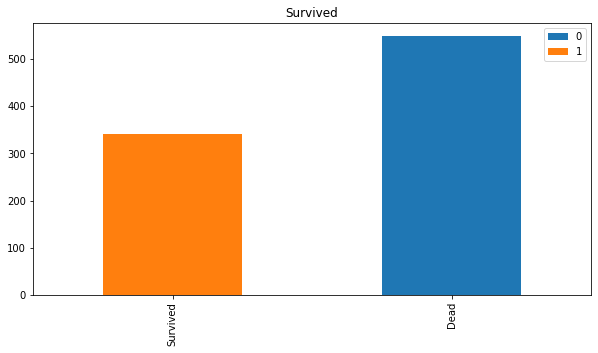

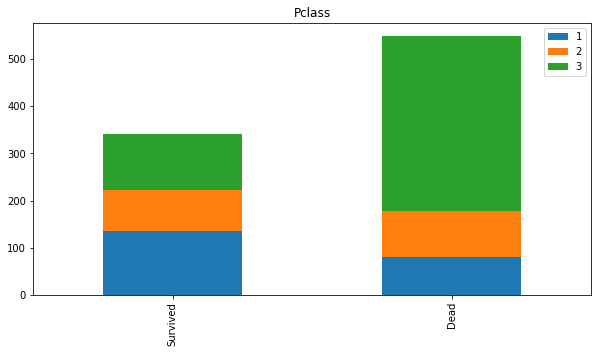

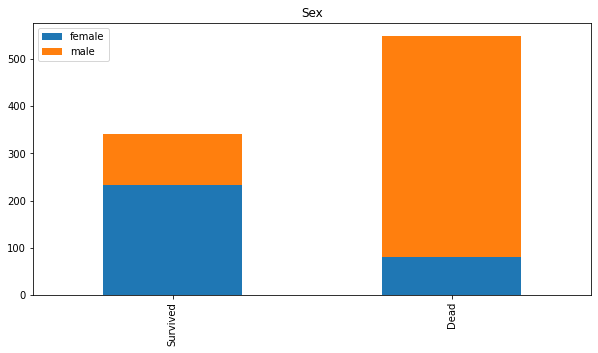

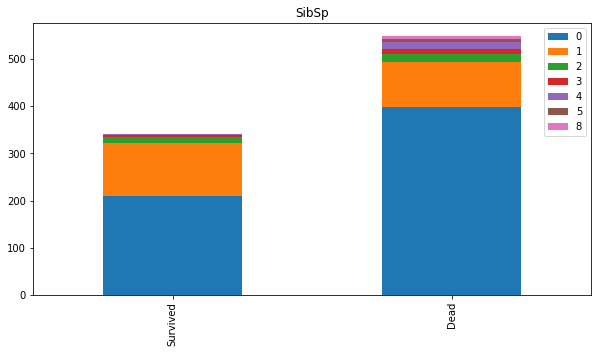

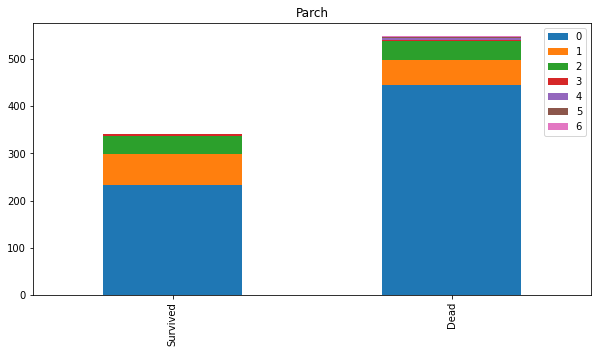

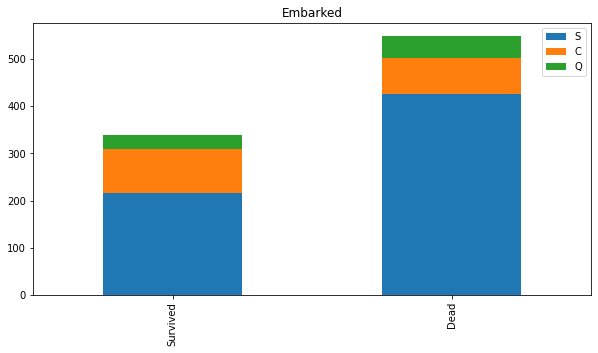

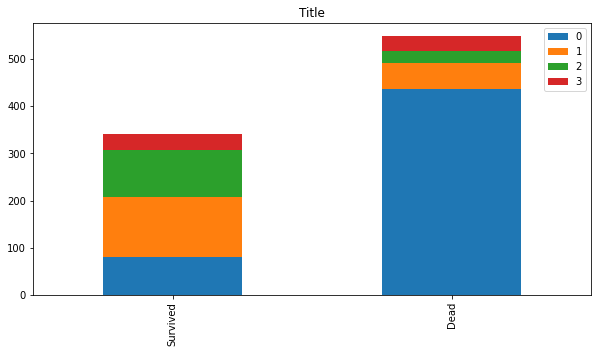

In [11]:
# feature별 클래스 개수의 기준을 정해놓고 자동으로 보여지게끔

keys = train_preprocessed.keys().to_list()
num_class_limit = 7

for key in keys:
    if len(train_preprocessed[key].unique()) < num_class_limit + 1:
        bar_chart(train_preprocessed, key)

'Survived', 'Pclass', 'Sex', 'SibSp','Parch','Embarked'에 대해서 그래프를 그려봤고 몇 가지 intuition을 얻을 수 있었음

1. 죽은 사람이 더 많음
2. Pclass가 더 낮을 수록 죽었을 확률이 높음
3. 남성일수록 죽었을 확률이 높음
4. 같이 탄 가족이 없을 수록 죽었을 확률이 높음
5. Southhampton에서 탄 사람일 수록 죽었을 확률이 높음
6. Mr가 많이 죽음, Miss Mrs 덜 죽음

In [12]:
# Sex를 숫자로 표현 male:0. female:1

sex_mapping = {'male' : 0, 'female' : 1}

for dataset in datasets:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

## Null 값 처리

### Age
    우선 Name을 기반으로 새로 만든 feature인 Title을 기준으로 평균값을 구해 null 값을 채워준다.

In [13]:
train_preprocessed["Age"].fillna((train_preprocessed.groupby("Title")["Age"]).transform("median"), inplace=True)
test_preprocessed["Age"].fillna((test_preprocessed.groupby("Title")["Age"]).transform("median"), inplace=True)


In [14]:
train_preprocessed.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
dtype: int64

### Embarked
    2개의 Null 값을 어떻게 처리 해줄 것인가? 압도적으로 s 가 많은 상황에서 2개는 그저 s로 치환해도 괜찮을 것 같은 느낌
    배를 탄 지역과 관련이 높을 것 같은 feature를 통해 age와 같이 예측되는 값을 넣을 수 있음

In [15]:
train_preprocessed['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [16]:
test_preprocessed['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [17]:
train_preprocessed.loc[(train_preprocessed['Embarked'].isnull())]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
61,1,1,1,38.0,0,0,80.0,NaN,1
829,1,1,1,62.0,0,0,80.0,NaN,2


null인 값을 뽑아 봤을 때, Age와 Title만 다를 뿐, 나머지 feature는 똑같은 것을 확인, 비슷한 곳에서 embark 했을 가능성이 큼 => Fare와 Class를 통해 예측해보기

In [18]:
train_preprocessed[train_preprocessed['Pclass']==1]['Embarked'].value_counts() / train_preprocessed['Embarked'].value_counts()

S    0.197205
C    0.505952
Q    0.025974
Name: Embarked, dtype: float64

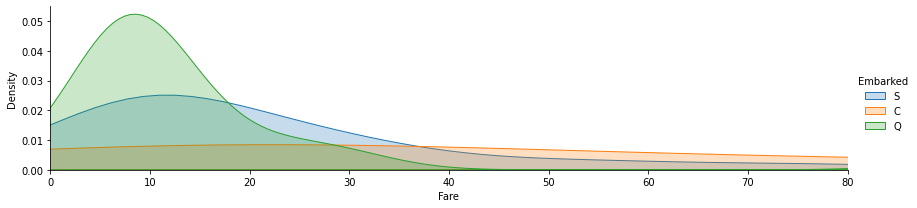

In [19]:
facet = sns.FacetGrid(train_preprocessed, hue='Embarked', aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, 80))
facet.add_legend()

1st class일 때, 절대적인 숫자에서는 S가 많았지만 비율을 봤을 때, C가 더 높았고 Fare가 80일 때 C일 가능성이 높기 때문에 Embarked가 Null인 데이터는 C로 채우기로 함

In [20]:
train_preprocessed['Embarked'].fillna('C', inplace=True)

In [21]:
train_preprocessed.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [22]:
train_preprocessed.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,0
1,1,1,1,38.0,1,0,71.2833,C,2
2,1,3,1,26.0,0,0,7.9250,S,1
3,1,1,1,35.0,1,0,53.1000,S,2
4,0,3,0,35.0,0,0,8.0500,S,0


Embarked가 문자형이기 때문에 숫자로 바꿔줘야함

In [23]:
embarked_mapping = {'S' : 0, 'C' : 1, 'Q' : 2}

for dataset in datasets:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [24]:
train_preprocessed.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,0,0
1,1,1,1,38.0,1,0,71.2833,1,2
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,2
4,0,3,0,35.0,0,0,8.0500,0,0


어느 정도 feature engineering은 끝난 것 같음.
그런데 Age와 Fare 같이 continuous한 데이터는 굉장히 Sparse하기 때문에 Categorizing이 필요함
그래프로 시각화해서 특정 구간으로 데이터별로 어떤 특징을 가지는 지 확인이 필요.

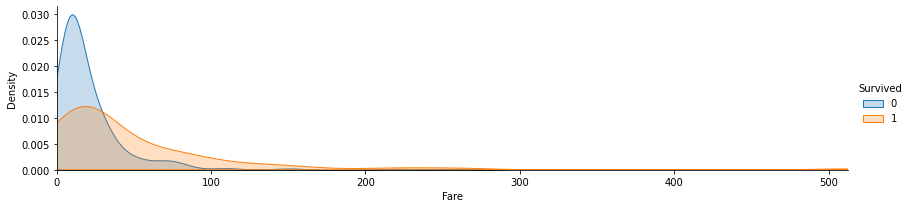

In [25]:
facet = sns.FacetGrid(train_preprocessed, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train_preprocessed['Fare'].max()))
facet.add_legend()

특징을 보면 사망한 사람의 대부분이 0~30 사이 
100 이상 부터는 사망한 사람이 매우 희박함 => 25로 간격을 설정해서 다시 그래프를 그려보자
=> 자세하게 살펴보니 0~29까지 사망한 사람의 비중이 더 높음, 10일 때 절정 => 0-29, 29-50, 50-100, 100-

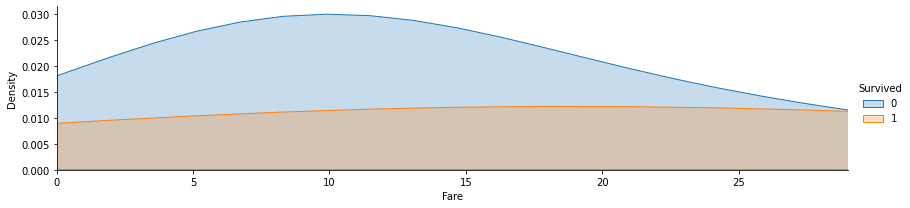

In [26]:
facet = sns.FacetGrid(train_preprocessed, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, 29))
facet.add_legend()

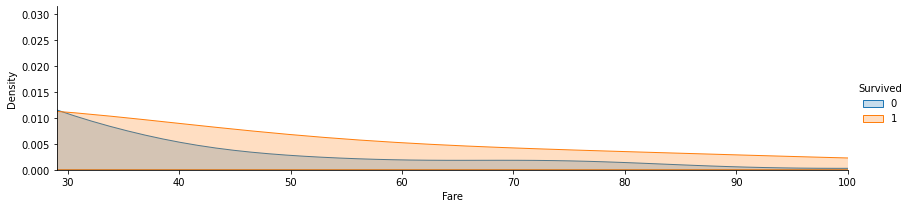

In [27]:
facet = sns.FacetGrid(train_preprocessed, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(29, 100))
facet.add_legend()

In [28]:
for dataset in datasets:
    dataset.loc[dataset['Fare'] <= 29, "Fare"] = [0],
    dataset.loc[(dataset['Fare'] > 29) & (dataset['Fare'] <= 50), 'Fare'] = [1],
    dataset.loc[(dataset['Fare'] > 50) & (dataset['Fare'] <= 100), 'Fare'] = [2],
    dataset.loc[dataset['Fare'] > 100, 'Fare'] = [3],

train_preprocessed['Fare'].unique()


array([0., 2., 1., 3.])

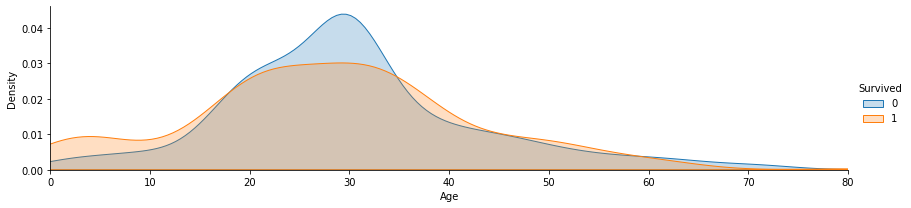

In [29]:
facet = sns.FacetGrid(train_preprocessed, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train_preprocessed['Age'].max())) #=> 0-18, 18-35, 35- 45, 45-61 그래프의 변화 추이를 확인해서 유의미한 점을 기준으로 삼음
facet.add_legend()

In [30]:
for dataset in datasets:
    dataset.loc[dataset['Age'] <= 18, "Age"] = [0],
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 35), 'Age'] = [1],
    dataset.loc[(dataset['Age'] > 35) & (dataset['Age'] <= 45), 'Age'] = [2],
    dataset.loc[(dataset['Age'] > 45) & (dataset['Age'] <= 61), 'Age'] = [3],
    dataset.loc[dataset['Age'] > 100, 'Age'] = [4],

train_preprocessed['Age'].unique()
   

array([ 1. ,  2. ,  3. ,  0. , 66. , 65. , 71. , 70.5, 62. , 63. , 64. ,
       80. , 70. , 74. ])

## SipSp & Parch

많은 예제에서 두 데이터를 합쳐서 Family_size라는 새로운 Feature를 만들게 되었는데, 둘 모두 가족이지만 서로가 다른 특징을 갖고 있다고 생각되기 때문에 여기서는 따로 처리를 하지 않을 예정

In [31]:
train_preprocessed.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,0.0,0,0
1,1,1,1,2.0,1,0,2.0,1,2
2,1,3,1,1.0,0,0,0.0,0,1
3,1,1,1,1.0,1,0,2.0,0,2
4,0,3,0,1.0,0,0,0.0,0,0
5,0,3,0,1.0,0,0,0.0,2,0
6,0,1,0,3.0,0,0,2.0,0,0
7,0,3,0,0.0,3,1,0.0,0,3
8,1,3,1,1.0,0,2,0.0,0,2
9,1,2,1,0.0,1,0,1.0,1,2


In [32]:
test_preprocessed.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,1.0,0,0,0.0,2,0
1,893,3,1,3.0,1,0,0.0,0,2
2,894,2,0,62.0,0,0,0.0,2,0
3,895,3,0,1.0,0,0,0.0,0,0
4,896,3,1,1.0,1,1,0.0,0,2
5,897,3,0,0.0,0,0,0.0,0,0
6,898,3,1,1.0,0,0,0.0,2,1
7,899,2,0,1.0,1,1,0.0,0,0
8,900,3,1,0.0,0,0,0.0,1,2
9,901,3,0,1.0,2,0,0.0,0,0


마지막으로, 훈련용 데이터셋에서 target 값을 분리시켜 따로 저장해주면 데이터 전처리 완료

In [33]:
target = train_preprocessed['Survived']
train_preprocessed.drop('Survived', axis=1, inplace=True)


In [34]:
train_preprocessed.shape, target.shape

((891, 8), (891,))

# Modeling

전처리한 데이터를 바탕으로 classifier 모델을 구성<br>
총 5가지 알고리즘으로 실험을 진행해볼 예정<br>
    1. KNN
    2. Decision Tree
    3. Random Forest
    4. Naive Bayes
    5. SVM

cross-validation 활용

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [36]:
train_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
 7   Title     891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [37]:
# Cross-Validation (K-Fold)
from sklearn.model_selection import cross_val_score

## KNN

In [38]:
clf = KNeighborsClassifier(n_neighbors=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_preprocessed, target, cv=10, scoring='accuracy')
round(np.mean(score)*100, 2)

81.03

## Decision Tree

In [39]:
clf = DecisionTreeClassifier()
score = cross_val_score(clf, train_preprocessed, target, cv=10, scoring='accuracy')
round(np.mean(score)*100, 2)

80.36

## Random Forest

In [40]:
clf = RandomForestClassifier(n_estimators=13)
score = cross_val_score(clf, train_preprocessed, target, cv=10, scoring='accuracy')
round(np.mean(score)*100, 2)

80.25

## Naive Bayes

In [41]:
clf = GaussianNB()
score = cross_val_score(clf, train_preprocessed, target, cv=10, scoring='accuracy')
round(np.mean(score)*100, 2)

79.46

## SVM

In [42]:
clf = SVC()
score = cross_val_score(clf, train_preprocessed, target, cv=10, scoring='accuracy')
round(np.mean(score)*100, 2)

80.92

In [51]:
clf = SVC()
clf.fit(train_preprocessed, target)

test_data = test_preprocessed.drop("PassengerId", axis=1).copy()

test_data["Fare"].fillna(test_data.groupby("Embarked")["Fare"].transform("median"), inplace=True)
prediction = clf.predict(test_data)

#test_data.isnull().sum()


In [52]:
prediction

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [53]:
submission = pd.DataFrame({
    "PassangerId": test_preprocessed["PassengerId"],
    "Survived" : prediction
})

submission.to_csv('submission.csv', index=False)

In [54]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassangerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
